In [64]:
import os
import numpy as np
from helpers import *
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from PIL import Image
from scipy import ndimage
from deep_NN import *

plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
def load_jpeg_dataset(N):    
    Y = np.array([])#, dtype=np.int64).reshape((num_px*num_px*3,1))
    X = np.empty((num_px*num_px*3,1))

    dataset_dir = '/home/matt/work/dev/ml/datasets/cats_and_dogs/'
    counter = 0
    # Fill classes array: 1 m_px* cat, 0 - dog
    for _file in os.listdir(dataset_dir + 'train/'):
        if counter >= N:
            break
        filename, ext = os.path.splitext(_file)

        # Set labels
        _class = 1 if filename.startswith('cat') else 0
        Y = np.append(Y, _class)

        # Get image and resize it
        fname = dataset_dir + 'train/' + filename+ext
        image = np.array(ndimage.imread(fname, flatten=False))
        image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))

        X = np.hstack((X, image/256))
        counter += 1

    # Delete the first element which was added due to shapes mismatching
    X = np.delete(X, 0, 1)

    # Reshape Y to the form of (1, m)
    Y = Y.reshape((1, Y.shape[0]))
    
    # Train/test split
    test_len = N//3
    train_len = N - test_len
    X_train, X_test = X[:, :train_len], X[:, train_len:]
    Y_train, Y_test = Y[:, :train_len], Y[:, train_len:]
    
    return X_train, X_test, Y_train, Y_test

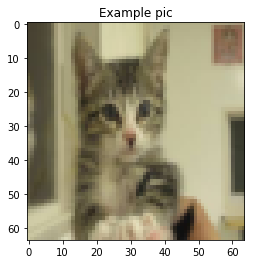

In [171]:
X_train, X_test, Y_train, Y_test = load_jpeg_dataset(5000)
plt.title('Example pic')
plt.imshow(X_train[:,11].reshape(64,64,3), interpolation='nearest')

Cost after iteration 0: 0.728920
Cost after iteration 100: 0.412733
Cost after iteration 200: 0.175553


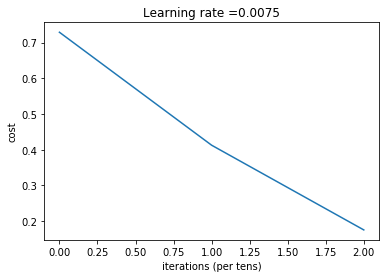

In [168]:
layers_size = [12288, 64, 16, 4, 1]
parameters = deep_NN_model(X_train, Y_train, layers_size, learning_rate=0.0075, n_iters=3000)

In [169]:
predictions_train = predict(X_train, Y_train, parameters)

Accuracy: 1.0


In [170]:
predictions_test = predict(X_test, Y_test, parameters)

Accuracy: 0.666666666667
